# TOUGH3 input and output reading and plotting routines

In [10]:
import toughio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
from matplotlib import gridspec

### Convert OUTPUT file (and plot in paraview)

Converts the OUTPUT from TOUGH3 as .csv file to a .xdmf format to be read by paraview

1) go to the terminal and open the folder where the file 'OUTPUT_ELEME.csv' is saved.
2) type: path/toughio-export --file-format xdmf OUTPUT_ELEME.csv
    -> e.g.: /home/victor/.local/bin/toughio-export --file-format xdmf OUTPUT_ELEME.csv
3) open paraview and open exported file for visualization.
4) alternatively, run it here:

In [11]:
import os

path = '/home/victor/.local/bin/toughio-export --file-format '
format = 'xdmf '     # options are: tecplot for .dat, vtk for .vtk, vtu for .vtu, xdmf for .xdmf
filepath = '/home/victor/Desktop/toughio/examples/heat_and_fluid_flow_from_magmatic_fluids/2_injection/working_try_4/'
filename = 'OUTPUT_ELEME.csv'       # optionally add the path in front if in a different folder ...

# export file
os.system(path + format + filepath + filename)

# execute paraview
os.system('paraview')

Reading file '/home/victor/Desktop/toughio/examples/heat_and_fluid_flow_from_magmatic_fluids/injection/working_try_4/OUTPUT_ELEME.csv' ... Done!
Mesh file not specified, inferring dimensionality ... Done!
Mesh is 2D, performing point triangulation ... Done!
Writing output file '/home/victor/Desktop/toughio/examples/heat_and_fluid_flow_from_magmatic_fluids/injection/working_try_4/OUTPUT_ELEME.xdmf' ... Done!


0

### Read and plot INCON for eos2

- Read mesh coordinates
- Read incon file
- Plot primary variables from incon file

In [9]:
# read MESH and INCON files
path = '/home/victor/Desktop/toughio/examples/heat_and_fluid_flow_from_magmatic_fluids/'

mesh_data = toughio.read_mesh(path + 'MESH')

incon_data = toughio.read_input(path + 'SAVE')

ele_list = list(mesh_data['elements'].keys())

# save coordinates from mesh
x_pts = []
z_pts = []
# save primary variables from incon
pv_1 = []
pv_2 = []
pv_3 = []
for i in range(len(ele_list)):
    x_pts.append(mesh_data['elements'][ele_list[i]]['center'][0])
    z_pts.append(mesh_data['elements'][ele_list[i]]['center'][2])
    pv_1.append(incon_data['initial_conditions'][ele_list[i]]['values'][0])
    pv_2.append(incon_data['initial_conditions'][ele_list[i]]['values'][1])
    pv_3.append(incon_data['initial_conditions'][ele_list[i]]['values'][2])

X, Z = np.meshgrid(x_pts, z_pts)

pv_1_image = griddata((np.asarray(x_pts), np.asarray(z_pts)), np.asarray(pv_1),
                      (X, Z), method='linear')
pv_2_image = griddata((np.asarray(x_pts), np.asarray(z_pts)), np.asarray(pv_2),
                      (X, Z), method='linear')
pv_3_image = griddata((np.asarray(x_pts), np.asarray(z_pts)), np.asarray(pv_3),
                      (X, Z), method='linear')

/tmp/ipykernel_32275/3579429756.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


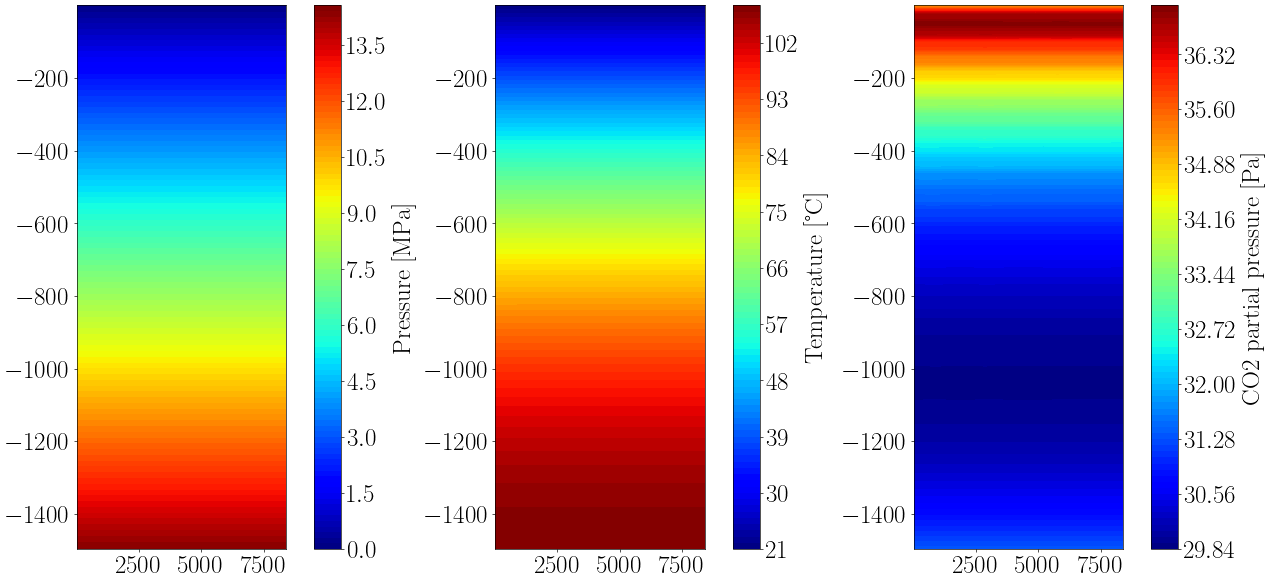

In [10]:
# setting up for plotting
plt.rcParams['figure.dpi'] = 60
plt.rcParams['font.size'] = 30
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = 'white'

# plot initial conditions (INCON)

fig = plt.figure(figsize=[24, 12])
gs = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.5)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

cp1 = ax1.contourf(X, Z, pv_1_image / (1.e6), levels=100, cmap='jet')
cb1 = plt.colorbar(cp1, ax=ax1, pad=0.1)
cb1.set_label('Pressure [MPa]')

cp2 = ax2.contourf(X, Z, pv_2_image, levels=100, cmap='jet')
cb2 = plt.colorbar(cp2, ax=ax2, pad=0.1)
cb2.set_label('Temperature [°C]')

cp3 = ax3.contourf(X, Z, pv_3_image, levels=100, cmap='jet')
cb2 = plt.colorbar(cp3, ax=ax3, pad=0.1)
cb2.set_label('CO2 partial pressure [Pa]')

fig.savefig(path + 'init_conditions.png')
fig.show()